In [176]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans



In [177]:
Data = pd.read_csv('healthcare_dataset.csv', encoding='latin1')

In [ ]:

# Initial Data Review

print(Data.info())
print(Data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [ ]:
# Convert Date Columns to Format datetime
Data['Date of Admission'] = pd.to_datetime(Data['Date of Admission'])
Data['Discharge Date'] = pd.to_datetime(Data['Discharge Date'])

In [ ]:
# Calculate the Length of Hospital Stay for Patients
Data['Length of Stay'] = (Data['Discharge Date'] - Data['Date of Admission']).dt.days


In [ ]:
# Cleaning
Data.dropna(inplace=True)
Data.drop(columns=['Name', 'Doctor', 'Hospital','Room Number','Medication'], inplace=True)

Data.head()

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Test Results,Length of Stay
0,30,Male,B-,Cancer,2024-01-31,Blue Cross,18856.281306,Urgent,2024-02-02,Normal,2
1,62,Male,A+,Obesity,2019-08-20,Medicare,33643.327287,Emergency,2019-08-26,Inconclusive,6
2,76,Female,A-,Obesity,2022-09-22,Aetna,27955.096079,Emergency,2022-10-07,Normal,15
3,28,Female,O+,Diabetes,2020-11-18,Medicare,37909.782410,Elective,2020-12-18,Abnormal,30
4,43,Female,AB+,Cancer,2022-09-19,Aetna,14238.317814,Urgent,2022-10-09,Abnormal,20


In [ ]:
# Converting Text Data to Numeric Using LabelEncoder
le = LabelEncoder()
categorical_columns = ['Gender', 'Blood Type', 'Medical Condition','Admission Type', 'Insurance Provider','Test Results']

for col in categorical_columns:
    Data[col + '_encoded'] = le.fit_transform(Data[col])
    
Data.head()    


,Age,Gender,Blood Type,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Test Results,Length of Stay,Gender_encoded,Blood Type_encoded,Medical Condition_encoded,Admission Type_encoded,Insurance Provider_encoded,Test Results_encoded
0,30,Male,B-,Cancer,2024-01-31,Blue Cross,18856.281306,Urgent,2024-02-02,Normal,2,1,5,2,2,1,2
1,62,Male,A+,Obesity,2019-08-20,Medicare,33643.327287,Emergency,2019-08-26,Inconclusive,6,1,0,5,1,3,1
2,76,Female,A-,Obesity,2022-09-22,Aetna,27955.096079,Emergency,2022-10-07,Normal,15,0,1,5,1,0,2
3,28,Female,O+,Diabetes,2020-11-18,Medicare,37909.782410,Elective,2020-12-18,Abnormal,30,0,6,3,0,3,0
4,43,Female,AB+,Cancer,2022-09-19,Aetna,14238.317814,Urgent,2022-10-09,Abnormal,20,0,2,2,2,0,0


In [ ]:
# Selecting Numeric Columns for Correlation Analysis
numeric_columns = ['Age', 'Billing Amount', 'Length of Stay'] + [col + '_encoded' for col in categorical_columns]
numeric_df = Data[numeric_columns]
# Calculate the Correlation Matrix
correlation_matrix = numeric_df.corr()



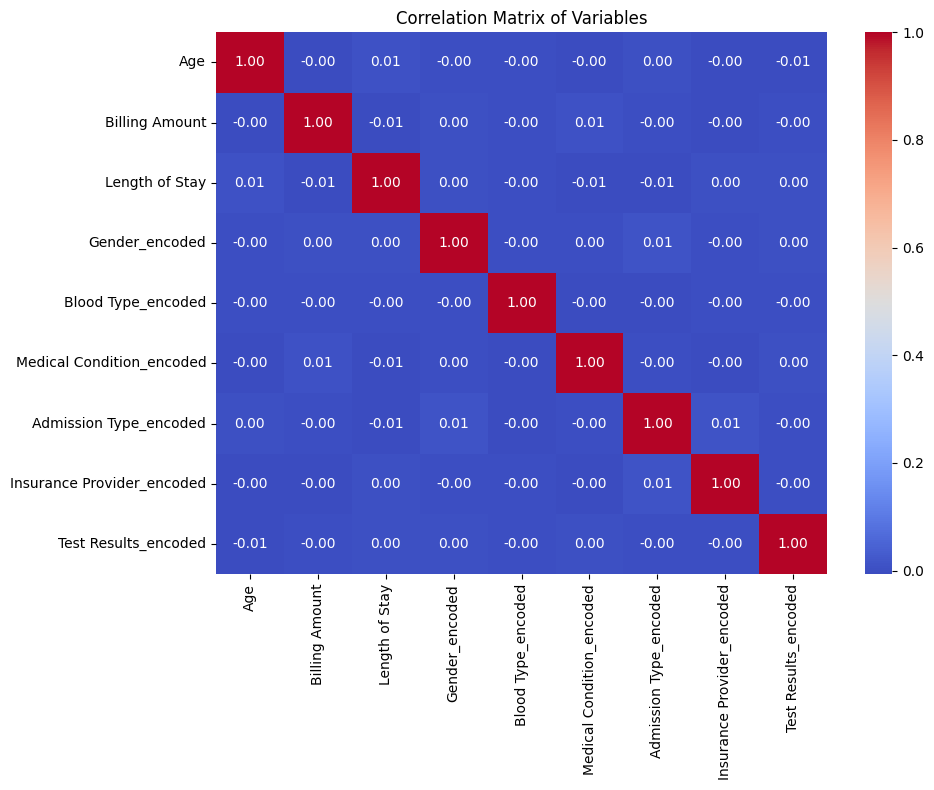

In [199]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Variables')
plt.tight_layout()
plt.show()


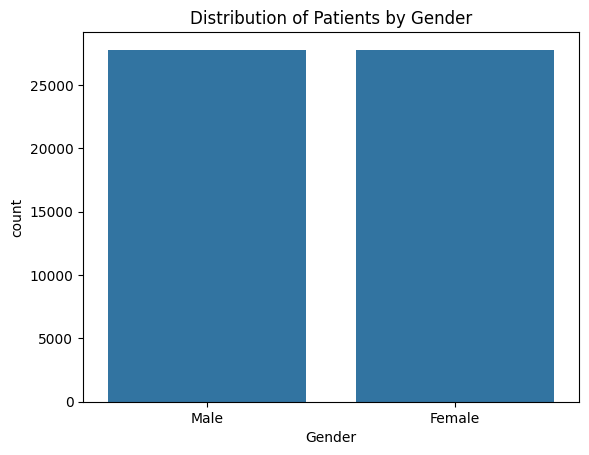

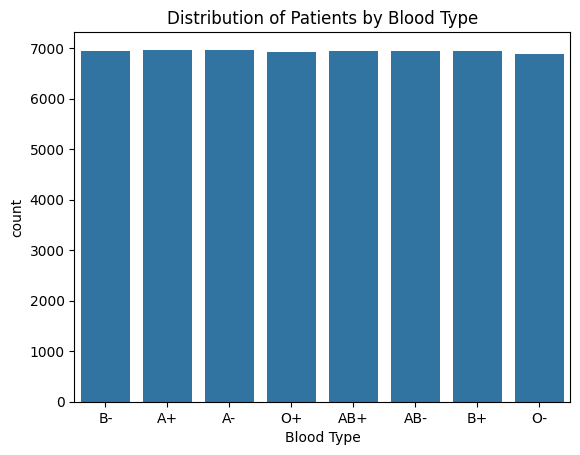

In [ ]:
# Analyzing the Distribution of Patients Based on Gender and Blood Group
sns.countplot(x='Gender', data=Data)
plt.title("Distribution of Patients by Gender")
plt.show()

sns.countplot(x='Blood Type', data=Data)
plt.title("Distribution of Patients by Blood Type")
plt.show()

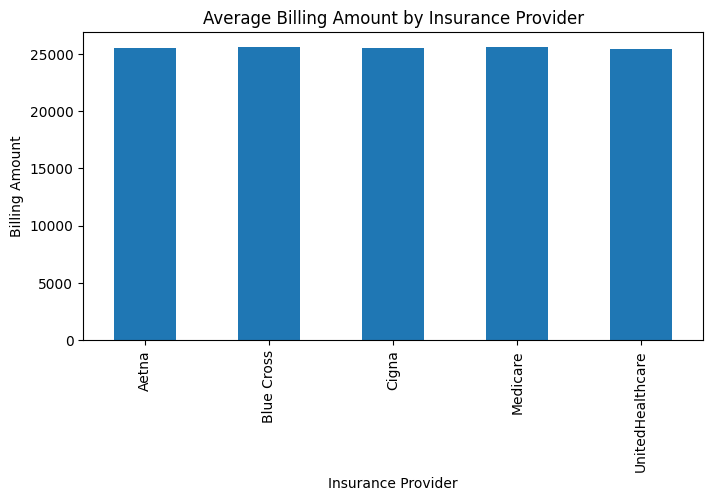

In [ ]:
# Analyzing the Average Treatment Costs Based on Insurance
Data.groupby('Insurance Provider')['Billing Amount'].mean().plot(kind='bar', figsize=(8,4))
plt.title("Average Billing Amount by Insurance Provider")
plt.ylabel("Billing Amount")
plt.show()

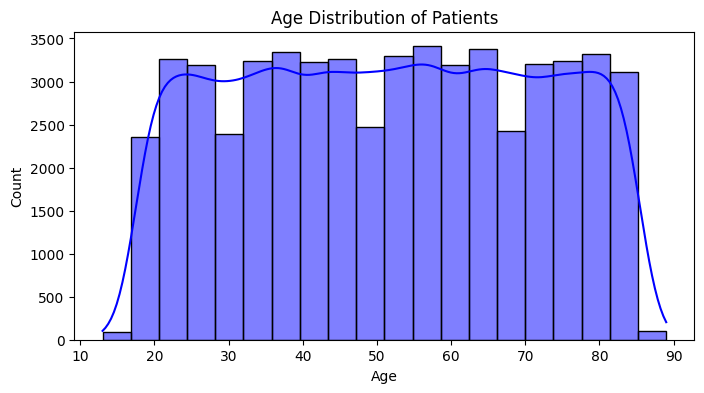

In [187]:
plt.figure(figsize=(8,4))
sns.histplot(Data['Age'], bins=20, kde=True, color='blue')
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

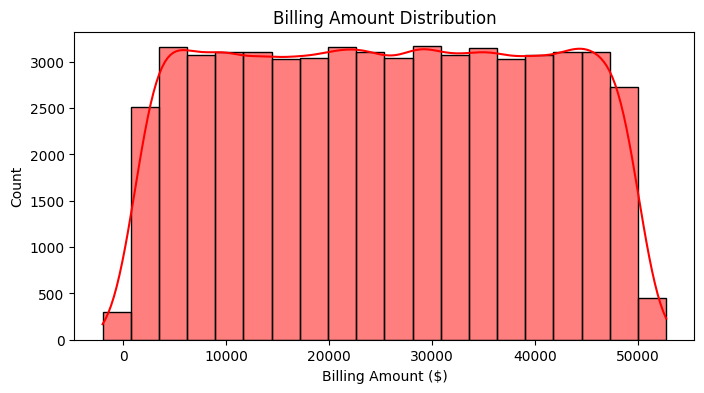

In [ ]:
# Analyzing the Distribution of Treatment Costs
plt.figure(figsize=(8,4))
sns.histplot(Data['Billing Amount'], bins=20, kde=True, color='red')
plt.title("Billing Amount Distribution")
plt.xlabel("Billing Amount ($)")
plt.ylabel("Count")
plt.show()

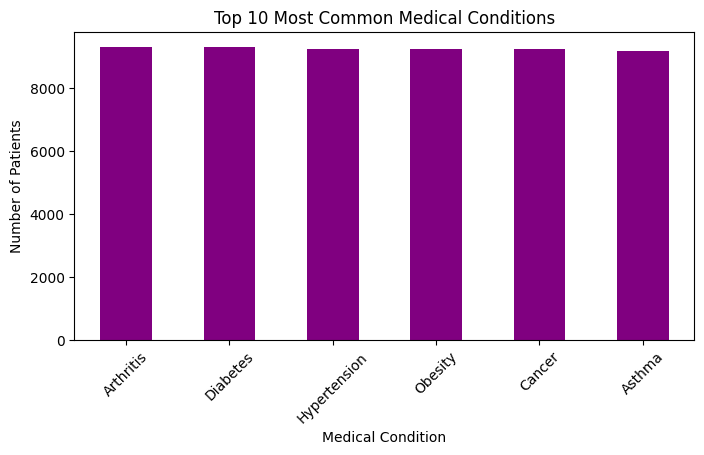

In [ ]:
# Analyzing the Most Common Diseases
plt.figure(figsize=(8,4))
Data['Medical Condition'].value_counts().head(10).plot(kind='bar', color='purple')
plt.title("Top 10 Most Common Medical Conditions")
plt.xlabel("Medical Condition")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45)
plt.show()

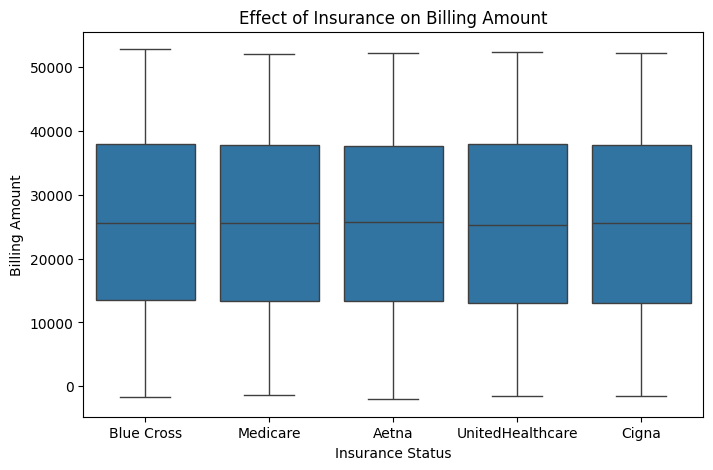

In [ ]:
# Comparison of Treatment Costs Between Insured and Uninsured Patients
plt.figure(figsize=(8,5))
sns.boxplot(x=Data['Insurance Provider'], y=Data['Billing Amount'])
plt.title("Effect of Insurance on Billing Amount")
plt.xlabel("Insurance Status")
plt.ylabel("Billing Amount")
plt.show()

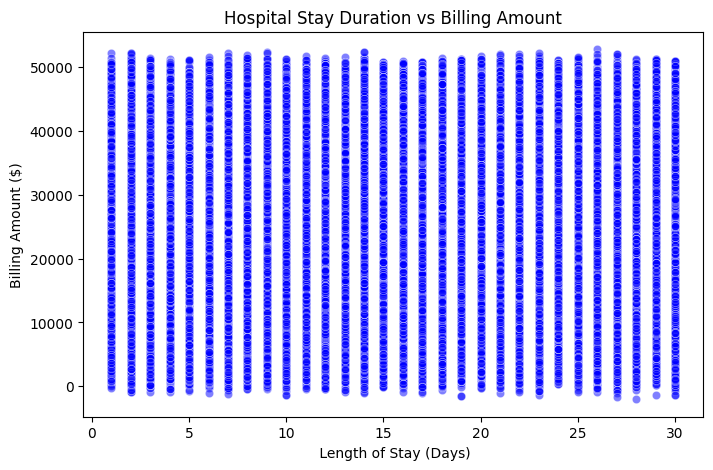

In [ ]:
# Plotting the Relationship Between Hospitalization Days and Treatment Costs
plt.figure(figsize=(8,5))
sns.scatterplot(x=Data['Length of Stay'], y=Data['Billing Amount'], alpha=0.5, color='blue')
plt.title("Hospital Stay Duration vs Billing Amount")
plt.xlabel(" Length of Stay (Days)")
plt.ylabel("Billing Amount ($)")
plt.show()

In [202]:
# Machine Learning Modeling: Predicting Treatment Costs Based on Age and Medical Condition

encoder = LabelEncoder()
Data['Medical Condition Encoded'] = encoder.fit_transform(Data['Medical Condition'])

features = ['Age', 'Medical Condition Encoded']
target = 'Billing Amount'
df_cleaned = Data.dropna(subset=features + [target])

X_train, X_test, y_train, y_test = train_test_split(df_cleaned[features], df_cleaned[target], test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f} dollars")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error: 12191.57 dollars
R² Score: -0.00


In [203]:
# Classification of Patients Based on Disease (Random Forest Classifier)
X = Data[['Age', 'Billing Amount', 'Length of Stay']]
y = Data['Medical Condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy of Disease Classification:", accuracy_score(y_test, y_pred))


Accuracy of Disease Classification: 0.1963063063063063


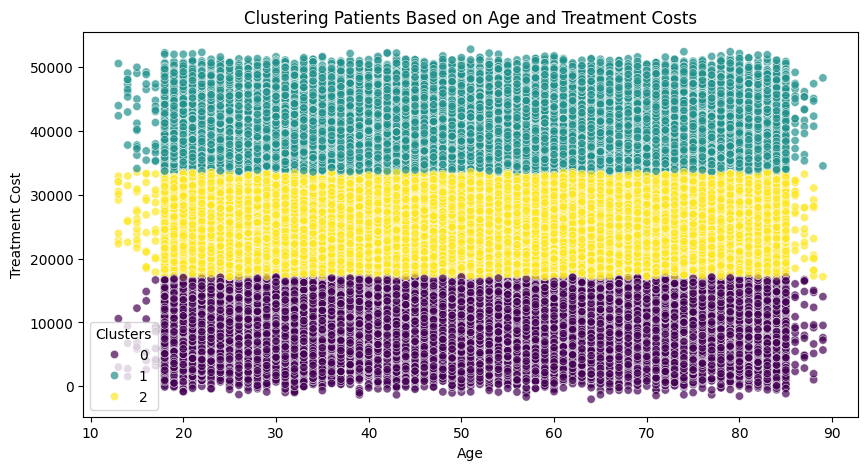

In [207]:
# Clustering Patients Using K-Means Based on Age and Treatment Costs
kmeans = KMeans(n_clusters=3, random_state=42)
Data['Cluster'] = kmeans.fit_predict(Data[['Age', 'Billing Amount']])

plt.figure(figsize=(10, 5))
sns.scatterplot(x=Data['Age'], y=Data['Billing Amount'], hue=Data['Cluster'], palette='viridis', alpha=0.7)
plt.title('Clustering Patients Based on Age and Treatment Costs')
plt.xlabel('Age')
plt.ylabel('Treatment Cost')
plt.legend(title='Clusters')
plt.show()